In [1]:
%load_ext autoreload
%autoreload 2

to do:
- other projections, especially for polar regions (evtl. with d3?)
- kosmetik
- same for Sentinel 2
- plot directly on leaflet widget?

In [2]:
import S3processingNew as s

In [3]:
prefix = '/eodata/Sentinel-3/OLCI/OL_1_EFR/2017/05/21/S3A_OL_1_EFR____20170520T095410_20170520T095710_20170521T141215_0179_018_022_2159_LN1_O_NT_002.SEN3/'

In [4]:
prod = s.asdf(prefix, 'test')
print(prod)

<S3processingNew.asdf instance at 0x7f8abe749ef0>


In [5]:
prod.ImportNetCDF(NumBand=10)

Importing 10 bands took 4.939143 seconds.


In [6]:
prod.CalcRGB()

In [7]:
prod.Scaling(scale=16)

In [8]:
prod.TransformCoords()

In [ ]:
prod.savePNG(createNewDir=True)

In [ ]:
prod.MercatorPlot()

In [20]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#from __future__ import print_function
from ipyleaflet import Map, ImageOverlay, Marker

rgb = prod.rgbraw.T

color_tuple = rgb.transpose((1,0,2)).reshape((rgb.shape[0]*rgb.shape[1],rgb.shape[2]))/np.max(prod.rgbraw)

plt.rcParams['figure.figsize'] = (5, 5)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.axis('off')
cd = prod.basemap.pcolormesh(prod.xCorners, prod.yCorners, prod.rgbraw[0,:,:], color=color_tuple, linewidth=0)
cd.set_array(None)

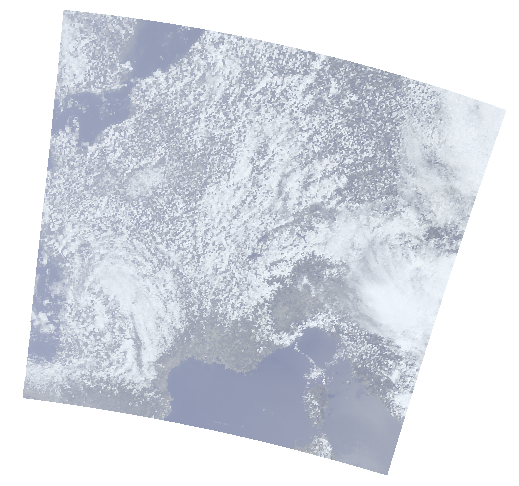

In [21]:
plt.show(cd)

In [27]:
center = [np.min(prod.lats)+(np.max(prod.lats)-np.min(prod.lats))/2, np.min(prod.lons)+(np.max(prod.lons)-np.min(prod.lons))/2]
zoom = 4
M = Map(center=center, zoom=zoom)

##### PLOT THE PRODUCT ON TOP OF THE MAP WITH ImageOverlay

imgName = plt.imshow(cd)

# bounds need to be in format [SW corner, NE corner]:
img_bounds = [(np.min(prod.lats),np.min(prod.lons)), (np.max(prod.lats),np.max(prod.lons))]

io = ImageOverlay(url=imgName, bounds=img_bounds)
M.add_layer(io)


TypeError: Image data can not convert to float

In [29]:
help(ImageOverlay)

Help on class ImageOverlay in module ipyleaflet.leaflet:

class ImageOverlay(RasterLayer)
 |  Method resolution order:
 |      ImageOverlay
 |      RasterLayer
 |      Layer
 |      ipywidgets.widgets.widget.Widget
 |      traitlets.config.configurable.LoggingConfigurable
 |      traitlets.config.configurable.Configurable
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      InteractMixin
 |      __builtin__.object
 |  
 |  Data descriptors defined here:
 |  
 |  attribution
 |      A trait for unicode strings.
 |  
 |  bounds
 |      An instance of a Python list.
 |  
 |  opacity
 |      A float trait.
 |  
 |  url
 |      A trait for unicode strings.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Layer:
 |  
 |  bottom
 |      A boolean (True, False) trait.
 |  
 |  options
 |      An instance of a Python list.
 |  
 |  visible
 |      A boolean (True, False) trait.
 |  
 |  ------